# Choose An Effective Visual
## A case study about online shoppers purchasing intention
Data Source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Description: Online shoppers - Description.pdf

Created by Jingwei Liu and Jeff Smith<br>
Revised by Junyao Yang


### Suppose one of your friends want to build an online shopping website, one day,  you found he seems worring about something. After talking with him, you knew he is currently have some problems when building the website:
#### <font color="blue">1. Due to the limited budget, he wants to know which way is better: designing a good infomation page or a good product-related page.</font>
#### <font color="blue">2. He plans to have an offline promotion activity in one region, but he doesn't know which region is a better choice.</font>
#### <font color="blue">3. He also plans to have an online promotion activity during one month except the conventional monthes (Nov. and Dec.). But, he can't decide which month is better.</font>
#### <font color="blue">4. Are there any differences in behaviors between new users and returned users?</font>

### Fortunately, you just have a dataset about online shopper purchasing intention. You decide to explore the data using visualization and try to find some useful information to help your friend.

### Let's import the tools at first and then read teh data as a dataframe using Pandas

In [1]:
#import the tools:numpy,pandas and matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# the file path
fname = "../../data/16_online_shoppers_purchasing_intention.csv"
# read the data into a pandas dataframe and show the fist five lines
data = pd.read_csv(fname)
data.head()

,Index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# a simple dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    12330 non-null  int64  
 1   Administrative           12330 non-null  int64  
 2   Administrative_Duration  12330 non-null  float64
 3   Informational            12330 non-null  int64  
 4   Informational_Duration   12330 non-null  float64
 5   ProductRelated           12330 non-null  int64  
 6   ProductRelated_Duration  12330 non-null  float64
 7   BounceRates              12330 non-null  float64
 8   ExitRates                12330 non-null  float64
 9   PageValues               12330 non-null  float64
 10  SpecialDay               12330 non-null  float64
 11  Month                    12330 non-null  object 
 12  OperatingSystems         12330 non-null  int64  
 13  Browser                  12330 non-null  int64  
 14  Region                

### Now, let's use this dataset to find some useful information. Let's check the average, min, max and std on time shoppers spend in informational page and product-related page.

In [4]:
# use pandas embeded function to compute some statistics in attribute [Informational_Duration] and [ProductRelated_Duration]
print("Max value in Informational_Duration  : {:0.2f} ".format(data['Informational_Duration'].max()))
print("Min value in Informational_Duration  : {:0.2f} ".format(data['Informational_Duration'].min()))
print("Mean value in Informational_Duration : {:0.2f} ".format(data['Informational_Duration'].mean()))
print("The std in Informational_Duration    : {:0.2f}".format(data['Informational_Duration'].std()))
print(50 * '-')
print("Max value in ProductRelated_Duration  : {:0.2f} ".format(data['ProductRelated_Duration'].max()))
print("Min value in ProductRelated_Duration  : {:0.2f} ".format(data['ProductRelated_Duration'].min()))
print("Mean value in ProductRelated_Duration : {:0.2f} ".format(data['ProductRelated_Duration'].mean()))
print("The std in ProductRelated_Duration    : {:0.2f}".format(data['ProductRelated_Duration'].std()))
print(50 * '-')
print("Max value in Administrative_Duration  : {:0.2f} ".format(data['Administrative_Duration'].max()))
print("Min value in Administrative_Duration  : {:0.2f} ".format(data['Administrative_Duration'].min()))
print("Mean value in Administrative_Duration : {:0.2f} ".format(data['Administrative_Duration'].mean()))
print("The std in Administrative_Duration    : {:0.2f}".format(data['Administrative_Duration'].std()))

Max value in Informational_Duration  : 2549.38 
Min value in Informational_Duration  : 0.00 
Mean value in Informational_Duration : 34.47 
The std in Informational_Duration    : 140.75
--------------------------------------------------
Max value in ProductRelated_Duration  : 63973.52 
Min value in ProductRelated_Duration  : 0.00 
Mean value in ProductRelated_Duration : 1194.75 
The std in ProductRelated_Duration    : 1913.67
--------------------------------------------------
Max value in Administrative_Duration  : 3398.75 
Min value in Administrative_Duration  : 0.00 
Mean value in Administrative_Duration : 80.82 
The std in Administrative_Duration    : 176.78


### First Visualization Tool--------Table
A table organizes data into a tabular structure, consisting of rows and columns. 

##### Pros:
    1. Reasonably easy to read and build 
    2. Incredibly flexible
##### Cons:
    1. Slower to visually extract information 
    2. No relationship between variables
    

##### When you should consider using a Table?
    1. Your data vareis in various way
    2. Your objective requires 
    3. Your audience needs
    
##### When you shouldn't consider using a Table?
    1. Not prefered for a formal public presentation
    2. You want to emphasize a pattern or relationship


### Customer Website Duration Table

| | Informational| ProductRelated| Administrative|
|:---------:|--------:|--------:|--------:|
|**Max**| 2549.38| 63973.52| 3398.75|
|**Min**| 0.00| 0.00 | 0.00 |
|**Avg**| 34.47| 1194.75| 80.82|
|**Std**| 140.75| 1913.67| 176.78|

### Any idea to make this table better?

##### Ans:

In [24]:
# You can also use the embeded function 'describe' to find the same values
data[['Informational_Duration','ProductRelated_Duration']].describe()

,Informational_Duration,ProductRelated_Duration
count,12330.000000,12330.000000
mean,34.472398,1194.746220
std,140.749294,1913.669288
min,0.000000,0.000000
25%,0.000000,184.137500
50%,0.000000,598.936905
75%,0.000000,1464.157214
max,2549.375000,63973.522230


### <font color = "red"> Now, you can tell your friend, based some online data, online shoppers will spend more time on product-related page. </font>

### Now, let's try to find the shopper numbers in different region

In [25]:
# Show how many shoppers shop in different region
data.groupby('Region')[['Index']].count()

,Index
Region,
1,4780
2,1136
3,2403
4,1182
5,318
6,805
7,761
8,434
9,511


### Second Visualization Tool--------Bar Chart
Graphing categorical data with value encoded by length

##### Pros:
    1. Very easy to read and compare
    2. Multiple Variations, vertical, horizontal, stacked, clustered, etc. 
##### Cons:
    1. Limited for Continuous Data
    2. Not Suitable for Complex Relationships
    3. Scaling Issues
    

##### When you should consider using a Bar Chart?
    1. Comparing limited number of categories
    2. Highlighting Extremes, Outliners
    
##### When you shouldn't consider using a Bar Chart?
    1. Limited Labeling Space
    2. Usually not apply to continuous data
    3. Heterogeneity data
    4. Complex Relationships

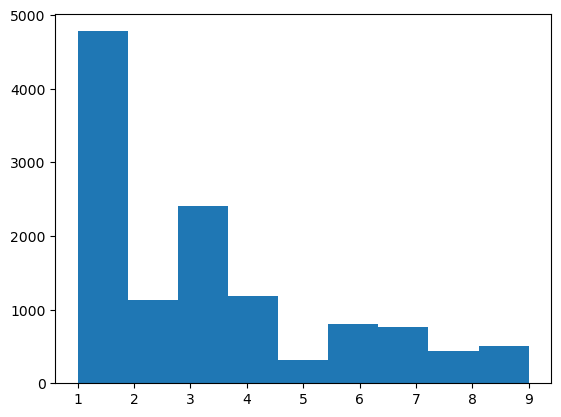

<AxesSubplot:ylabel='Frequency'>

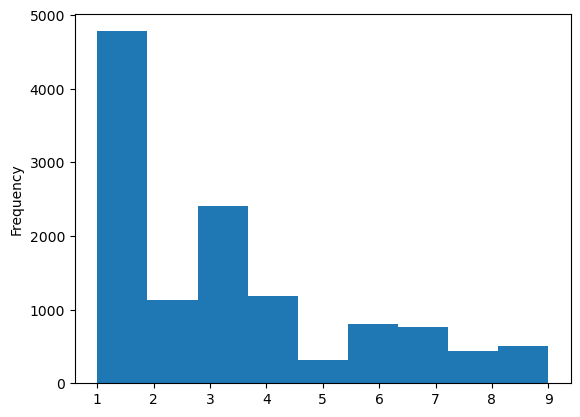

In [6]:
# you can also use histogram plot to show the difference
plt.hist(data['Region'], bins = 9);
plt.show()
# histogram using pandas library
data['Region'].plot.hist(bins=9)

#### We can clearly see that the number of online shoppers is very high in region 1. But does shopper in region 1 really have a higher percentage end up withing buying something? Let's check that!

In [11]:
# The number of shopppers in region1
region1_shopper_a = data[data['Region'] == 1]['Index'].size
# The number of shoppers end up buying somthing in region1
region1_shopper_b = data[(data['Region'] == 1) & (data['Revenue'] == True)]['Index'].size
# The number of shoppers in other regions 
regiono_shopper_a = data[data['Region'] != 1]['Index'].size
# The number of shoppers in other regions end up buying something
regiono_shopper_b = data[(data['Region'] != 1) & (data['Revenue'] == True)]['Index'].size

print("There is {:0.2f} percent of shoppers in region1 buy products".format(region1_shopper_b/region1_shopper_a))
print("There is {:0.2f} percent of shoppers in other regions(not region1) buy products".format(regiono_shopper_b/regiono_shopper_a))

There is 0.16 percent of shoppers in region1 buy products
There is 0.15 percent of shoppers in other regions(not region1) buy products


### Third Visualization Tool--------Pie Chart
Circular statistical graphic that is divided into slices to illustrate numerical proportions.
Expresses a part-to-whole relationship in your data

##### Pros:
    1. Percentage Display
    2. Useful for Small Data Sets
##### Cons:
    1. Inaccurate Perception of Area
    2. Difficulty with Many Categories:
    3. Scales problem
    
##### When you should consider using a Pie Chart?
    1. Clear Dominant Category
    2. Simple Proportional Representation
    
##### When you shouldn't consider using a Pie Chart?
    1. Limited Labeling Space
    2. Comparing Data across categories
    3. Time Series Data
    4. Complex Relationships

#### Let's use Pie chart to see the percentage of buying something in region 1 and other regions

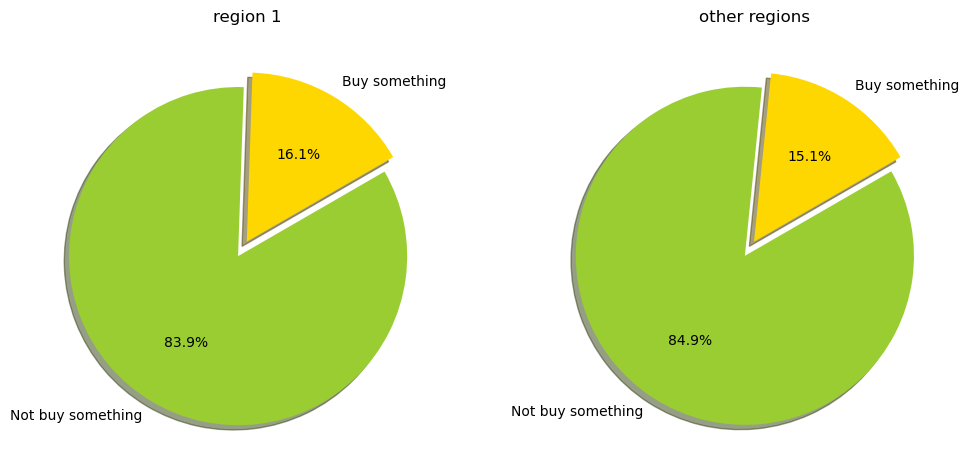

In [28]:
# labels for pie chart
labels = 'Buy something','Not buy something' 
# The number of shoppers end up not buying somthing in region1
region1_shopper_n = data[(data['Region'] == 1) &( data['Revenue'] != True)]['Index'].size
# The number of shoppers end up not buying somthing in other region
regiono_shopper_n = data[(data['Region'] != 1) & (data['Revenue'] != True)]['Index'].size
# the size(number) for each label in region1
region1_sizes = [region1_shopper_b,region1_shopper_n]    
# the size(number) for each label in other regions
regiono_sizes = [regiono_shopper_b,regiono_shopper_n] 

# optional parameters for better visualizition
plt.rcParams['figure.figsize'] = (12, 7) #figure size
colors = ['gold', 'yellowgreen']
explode = (0,0.1)

#plot pie chart for region 1
ax1 = plt.subplot(1, 2, 1)
patches, texts, autotexts = plt.pie(region1_sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=30) 
ax1.set_title("region 1")

#plot pie chart for other regions
ax2 = plt.subplot(1, 2, 2)
patches, texts, autotexts = plt.pie(regiono_sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=30) 
ax2.set_title("other regions");
# the semicolon is used to suppress the returned values from calling matplotlib functions. You can remove it to check what will heppen.

### So, it seems although there are more online shoppers in region 1, the shoppers shopping behavior are similiar to other regions

### <font color = "red"> Based on the above cells, you can tell your friend that region 1 has more online shoppers and the shoppers there are similiar to other regions so that hold a promotion activity in region 1 could be better</font>

### Now we can try to find something related with Month

In [29]:
# Show how many shoppers shop in different month
data.groupby('Month')[['Index']].count()

,Index
Month,
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


In [30]:
#re-ordered the month sequence
month = data.groupby('Month')['Index'].size().reset_index(name = 'Shoppers number')
month['Month_No'] = [8,12,2,7,6,3,5,11,10,9]
month_ordered = month.sort_values(by='Month_No')
display(month_ordered)

,Month,Shoppers number,Month_No
2,Feb,184,2
5,Mar,1907,3
6,May,3364,5
4,June,288,6
3,Jul,432,7
0,Aug,433,8
9,Sep,448,9
8,Oct,549,10
7,Nov,2998,11
1,Dec,1727,12


#### Let's also use barplot to see the shopper number by month 

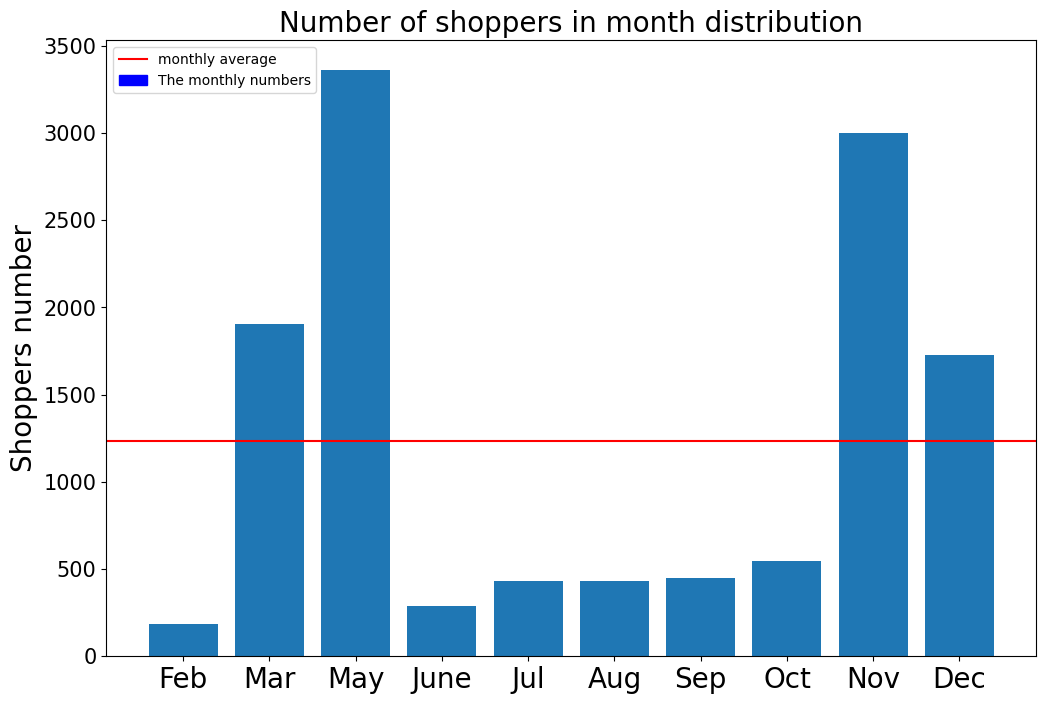

In [31]:
#plot the distribution
month_label = ('Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec')
fig,ax = plt.subplots(figsize=(12,8))
plt.bar(month_label,month_ordered['Shoppers number'])
plt.ylabel('Shoppers number',fontsize = 20)
plt.title('Number of shoppers in month distribution',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

#plot the mean value line
mean = month_ordered['Shoppers number'].mean()
ax.axhline(mean,color = 'red')

#plot lengend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
monthly_num = mpatches.Patch(color='blue', label='The monthly numbers')
monthly_avg = mlines.Line2D([],[], color='red', label='monthly average')
plt.legend(handles=[monthly_avg,monthly_num],loc=2);

### Forth Visualization Tool--------Line Chart
Line chart emphasizes visualizing trends, patterns, or relationships over a continuous or sequential set of data points.

##### Pros:
    1. Highlighting Trends or Patterns
    2. Sequential Data or Time series
##### Cons:
    1. Limited on dimention
    2. Misleading on forcasting
    

##### When you should consider using a Line Chart?
    1. Emphasizing Trends or Patterns
    2. Time series
    3. Continuous Data
    
##### When you shouldn't consider using a Line Chart?
    1. Complicated relations
    2. Categorical Data or Discrete Data with Jumps
    3. Limited Data Points

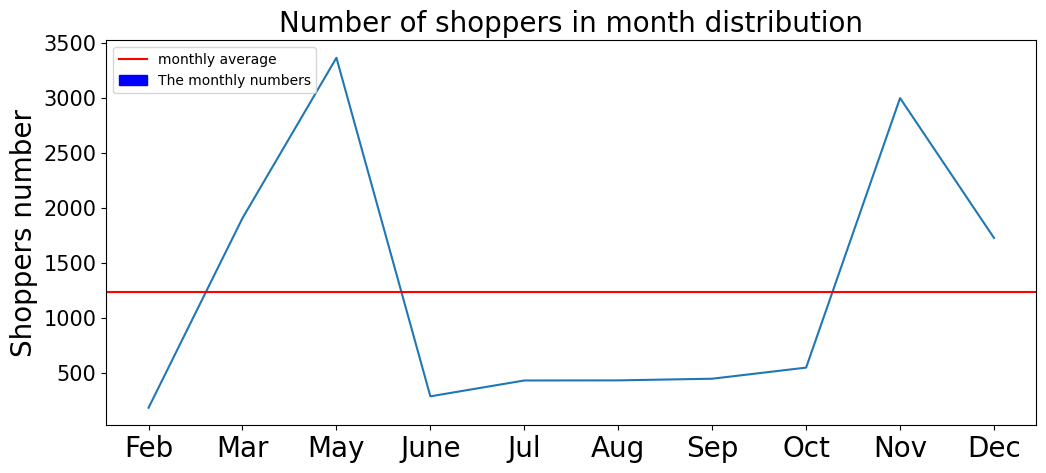

In [32]:
fig,ax = plt.subplots(figsize=(12, 5))
plt.plot(month_label,month_ordered['Shoppers number'])
plt.ylabel('Shoppers number',fontsize = 20)
plt.title('Number of shoppers in month distribution',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

#plot the mean value line
mean = month_ordered['Shoppers number'].mean()
ax.axhline(mean,color = 'red')

#plot lengend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
monthly_num = mpatches.Patch(color='blue', label='The monthly numbers')
monthly_avg = mlines.Line2D([],[], color='red', label='monthly average')
plt.legend(handles=[monthly_avg,monthly_num], loc=2);

### We can find that except Nov and Dec, online shoppers shop more in May.

### <font color = "red"> Based on the above cells, you can tell your friend that hold an online promotion activity in May could be better</font>

### Last, let's try to find some difference between new visitor and return visitor

#### Add a column to show the total time a shopper spend in all kinds of pages

In [33]:
# add a column[Total_Duration] to show hoy much total time 
# (Administrative_Duration + Informational_Duration + ProductRelated_Duration) a shopper spend
data['Total_Duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']
data[['Total_Duration']].head()

,Total_Duration
0,0.000000
1,64.000000
2,0.000000
3,2.666667
4,627.500000


In [34]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [35]:
return_visitor = data[data['VisitorType'] == "Returning_Visitor"]
new_visitor = data[data['VisitorType'] == "New_Visitor"]
other_visitor = data[data['VisitorType'] == "Other"]

return_visitor.shape, new_visitor.shape, other_visitor.shape

((10551, 20), (1694, 20), (85, 20))

In [36]:
# show mean and median of total_duration between different visitortype
data.groupby('VisitorType')[['Total_Duration']].aggregate(['mean','median'])

Total_Duration        
                            mean  median
VisitorType                             
New_Visitor           747.542141  500.75
Other                 644.785941  199.25
Returning_Visitor    1405.707121  736.00

#### It shows returning visitor spend more time on the online shopping website. You can also get a deeper look about the difference among  regions

In [37]:
# Whether each type of visitors have similiar behaviors in different regions
data.groupby(['Region', 'VisitorType'])['Total_Duration'].aggregate(['mean','median']).unstack()

mean                                    median              \
VisitorType New_Visitor       Other Returning_Visitor New_Visitor       Other   
Region                                                                          
1            699.179488  146.802083       1506.239403  475.422222   29.750000   
2            699.308605  253.500000       1402.636699  436.000000    0.000000   
3            840.070166   46.062500       1381.361269  539.029167   45.750000   
4            752.840459  363.550000       1301.451655  502.133333  343.000000   
5            769.732781         NaN       1360.120135  558.983333         NaN   
6            712.352741  133.500000       1209.852837  516.000000  133.500000   
7            766.459389   65.250000       1324.451794  564.251136   65.250000   
8            850.061008  396.166667       1296.368221  554.977083  396.166667   
9            780.434693  900.335848       1370.103029  539.250000  381.500000   

                               
VisitorType Returning_Visitor  
Region                         
1                  734.561039  
2                  783.791667  
3                  737.166667  
4                  730.857738  
5                  712.850000  
6                  709.733333  
7                  747.907778  
8                  770.028571  
9                  602.750000

### Fifth Visualization Tool--------Scatter plot
Explore relationships, patterns, distribution, or correlations between two continuous variables or samples

##### Pros:
    1. Highlighting individual sampels
    2. Correlation and regression analysis
    3. Bivariate Data Exploration
    4. Explore data distributions
##### Cons:
    1. Limited to Two Variables
    2. Limited for categorical data
    3. Difficulty with Dense Data
    4. Overemphasis on Individual Points

##### When you should consider using a Scatter plot?
    1. Continuous data
    2. Relationship analysis
    3. Explore individual samples
    4. Outliner detections
    
##### When you shouldn't consider using a Scatter plot?
    1. Categorical Data or Discrete Data with Jumps
    2. Limited Data Points or dense data
    3. Non linear relations
    

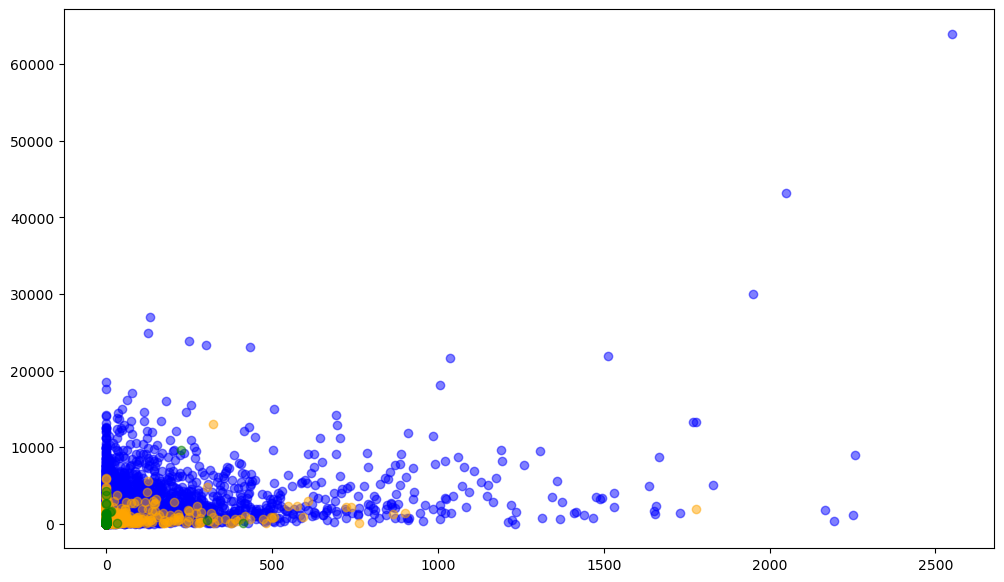

In [38]:
plt.scatter(return_visitor['Informational_Duration'], return_visitor['ProductRelated_Duration'], c = 'blue', alpha=0.5)
plt.scatter(new_visitor['Informational_Duration'], new_visitor['ProductRelated_Duration'], c = 'orange', alpha=0.5)
plt.scatter(other_visitor['Informational_Duration'], other_visitor['ProductRelated_Duration'], c = 'green', alpha=0.5)
plt.show()

#### Based on the median values, there seems no significant difference among regions

### Here just show some simple analysis, you can compare other parts among different visitor types. And you could get different conclusions based on your analysis.

### <font color = "red"> Based on the simple analysis above, you can tell your friend that returning visitor seems spend more time on the website</font>

## This notebook provides an example about using Pandas and Matplotlib to help us find some useful infomation. Pandas and Matplotlib are very powerful packages, besides the above usage, they provide lots of other useful functions. If you are interested in those functions, please refer to:
### Pandas: https://pandas.pydata.org/
### Matplotlib: https://matplotlib.org/